<a href="https://colab.research.google.com/github/VanesaHM/ProyectoKaggle/blob/main/01_exploraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UDEA/ai4eng 20252 - Pruebas Saber Pro Colombia**

Crear un modelo para predecir el redimiento de los estudiantes en las pruebas Saber Pro

**Descripción general**

Las Pruebas Saber Pro son exámenes estandarizados que se administran en Colombia para evaluar la calidad y el nivel de conocimiento y competencias de los estudiantes de educación superior, es decir, de instituciones de educación superior como universidades y tecnológicos. Estas pruebas son parte de los esfuerzos del Gobierno de Colombia para monitorear y mejorar la calidad de la educación superior en el país.

Estas Pruebas constan cinco componentes genéricos, Inglés, Lectura Crítica, Competencias Ciudadanas, Razonamiento Cuantitativo y Comunicación Escrita.

Tu tarea será crear un modelo de clasificación que para cada estudiante prediga qué desempeño va a tener: bajo, medio-bajo, medio-alto o alto.

**Descripción**

El conjunto de datos contiene más de 50 columnas que describen de manera distintos aspectos de cada estudiante, incluyendo:

Información socieconómica: Describen características socieconómicas del estudiante como su estrato, educación de sus padres, estrato, entre otras.

Información de instituciones: Describen las instituciones de donde provienen los estudiantes.

Información del estudiante: Describe particularidades del estudiante como su edad, que programa estudian, la modalidad de estudio, etc.

Información estadística: Describe algunos coeficientes que equipos de estudio han desarrollado que podría ayudar a la clasificación.

Así como muchos otros datos que ayudan a clasificar de manera precisa los niveles de desempeño

**1. Importar librerías**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**2. Configuración visual**

In [2]:
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", palette="muted")

3. Cargar los datos

In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia

  0% 0.00/29.9M [00:00<?, ?B/s]
100% 29.9M/29.9M [00:00<00:00, 1.10GB/s]


4. Descomprimir los datos

In [5]:
!unzip udea*.zip > /dev/null

In [7]:
train = pd.read_csv("train.csv")

5. Mostrar las dimensiones del dataset train.

Este archivo contiene todas las columnas que describen al estudiante, junto con las etiquetas de clasificación de desempeño RENDIMIENTO_GLOBAL, y el ID de cada estudiante ID

In [10]:
print("Dimensiones del dataset de entrenamiento:", train.shape)

Dimensiones del dataset de entrenamiento: (692500, 21)


6. Visualización general de los datos

In [11]:
display(train.head())

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


7. Información general

In [14]:
print("\nInformación general del dataset:\n")
train.info()


Información general del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           692500 non-null  int64  
 1   PERIODO_ACADEMICO            692500 non-null  int64  
 2   E_PRGM_ACADEMICO             692500 non-null  object 
 3   E_PRGM_DEPARTAMENTO          692500 non-null  object 
 4   E_VALORMATRICULAUNIVERSIDAD  686213 non-null  object 
 5   E_HORASSEMANATRABAJA         661643 non-null  object 
 6   F_ESTRATOVIVIENDA            660363 non-null  object 
 7   F_TIENEINTERNET              665871 non-null  object 
 8   F_EDUCACIONPADRE             669322 non-null  object 
 9   F_TIENELAVADORA              652727 non-null  object 
 10  F_TIENEAUTOMOVIL             648877 non-null  object 
 11  E_PRIVADO_LIBERTAD           692500 non-null  object 
 12  E_PAGOMATRICULAPROPIO  

1. El dataset contiene 21 columnas, de las cuales:

- 2 son numéricas enteras (int64),un identificador y un códigos (ID, PERIODO_ACADEMICO).

- 4 son numéricas continuas (float64), (INDICADOR_1, INDICADOR_2, INDICADOR_3, INDICADOR_4) que parecen índices estadísticos o variables derivadas útiles para la predicción, que pueden ser los resultados de las diferentes asignaturas que contempla las pruebas saber PRO

- 15 son categóricas (object), variables como E_PRGM_ACADEMICO, F_EDUCACIONPADRE, F_TIENEAUTOMOVIL, etc, que representan características socioeconómicas o contextuales del estudiante.

2. Varias columnas tienen valores nulos, especialmente las socioeconómicas:

Ejemplo:

E_HORASSEMANATRABAJA: 661,643 / 692,500, 4.46% faltantes.

F_TIENEAUTOMOVIL: 648,877 / 692,500, 6.3% faltantes.

F_TIENELAVADORA: 652,727 / 692,500, 5.7% faltantes.

Esto sugiere que habrá que tratar valores faltantes durante el preprocesamiento.

3. Se observa una columna repetida: F_TIENEINTERNET y F_TIENEINTERNET.1.

Esto indica que posiblemente se duplicó una variable al combinar bases de datos.

Habrá que revisar si son idénticas, si es así se debe eliminar una de ellas

In [15]:
print("\nColumnas con valores faltantes:")
missing = train.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
display(missing.head(10))


Columnas con valores faltantes:


,0
F_TIENEAUTOMOVIL,43623
F_TIENELAVADORA,39773
F_TIENECOMPUTADOR,38103
F_ESTRATOVIVIENDA,32137
E_HORASSEMANATRABAJA,30857
F_TIENEINTERNET.1,26629
F_TIENEINTERNET,26629
F_EDUCACIONMADRE,23664
F_EDUCACIONPADRE,23178
E_PAGOMATRICULAPROPIO,6498


8. Exploracón de la variable objetivo

In [16]:
print("\nDistribución de la variable objetivo (RENDIMIENTO_GLOBAL):")
display(train["RENDIMIENTO_GLOBAL"].value_counts())


Distribución de la variable objetivo (RENDIMIENTO_GLOBAL):


,count
RENDIMIENTO_GLOBAL,
alto,175619
bajo,172987
medio-bajo,172275
medio-alto,171619


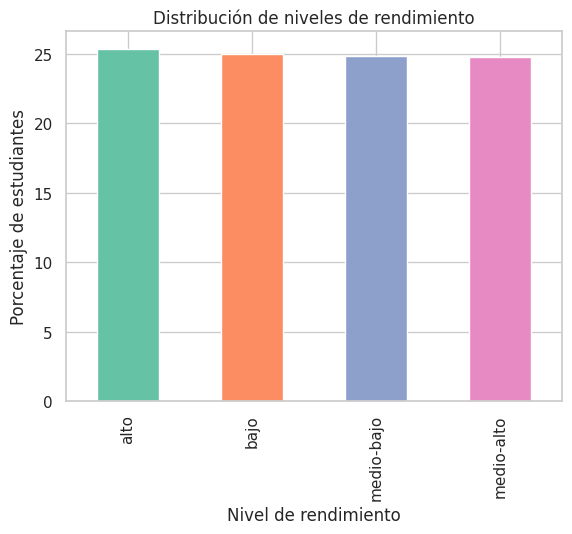

In [17]:
# Porcentaje
train["RENDIMIENTO_GLOBAL"].value_counts(normalize=True).mul(100).round(2).plot(
    kind='bar', color=['#66c2a5','#fc8d62','#8da0cb','#e78ac3']
)
plt.title("Distribución de niveles de rendimiento")
plt.xlabel("Nivel de rendimiento")
plt.ylabel("Porcentaje de estudiantes")
plt.show()

9. Exploración de algunas variables categóricas

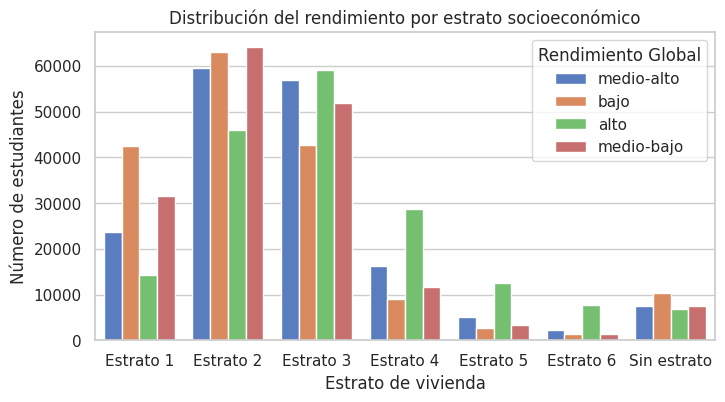

In [25]:
# ESTRATO SOCIOECONÓMICO DE LA VIVIENDA VS RENDIMIENTO GLOBAL DEL ESTUDIANTE

#Reemplazar valores vacíos o nulos por "Sin estrato"
train['F_ESTRATOVIVIENDA'] = (
    train['F_ESTRATOVIVIENDA']
    .fillna('Sin estrato')                # reemplaza NaN
    .replace('', 'Sin estrato')           # reemplaza cadena vacía
    .replace(' ', 'Sin estrato')          # reemplaza espacios
    .str.strip()                          # elimina espacios sobrantes
)

orden_estratos = [
    'Estrato 1', 'Estrato 2', 'Estrato 3',
    'Estrato 4', 'Estrato 5', 'Estrato 6', 'Sin estrato'
]

# Verificar si la columna existe y graficar
if 'F_ESTRATOVIVIENDA' in train.columns:
    plt.figure(figsize=(8,4))
    sns.countplot(
        x='F_ESTRATOVIVIENDA',
        data=train,
        hue='RENDIMIENTO_GLOBAL',
        order=orden_estratos
    )
    plt.title("Distribución del rendimiento por estrato socioeconómico")
    plt.xlabel("Estrato de vivienda")
    plt.ylabel("Número de estudiantes")
    plt.legend(title="Rendimiento Global")
    plt.show()



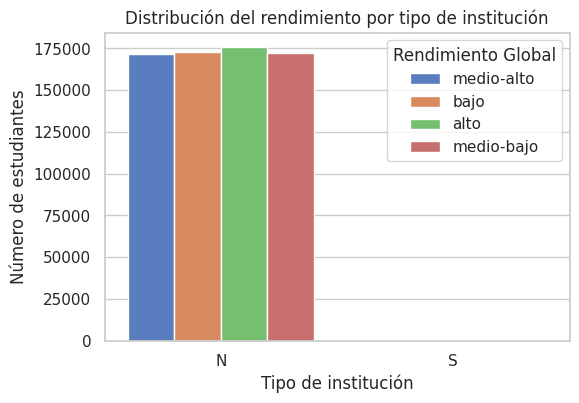

In [26]:
# ESTUDIANTES PRIVADOS DE LA LIBERTAD
if 'E_PRIVADO_LIBERTAD' in train.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(
        x='E_PRIVADO_LIBERTAD',
        data=train,
        hue='RENDIMIENTO_GLOBAL',
        order=train['E_PRIVADO_LIBERTAD'].value_counts().index
    )
    plt.title("Distribución del rendimiento por tipo de institución")
    plt.xlabel("Tipo de institución")
    plt.ylabel("Número de estudiantes")
    plt.legend(title="Rendimiento Global")
    plt.show()

No se tiene ningún registro de estudiantes que hayan presentado las pruebas saber PRO en estos periodos que sean privados de la libertad como lo muetsra el gráfico.

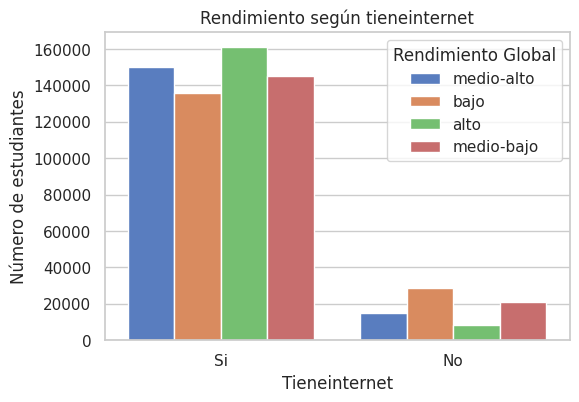

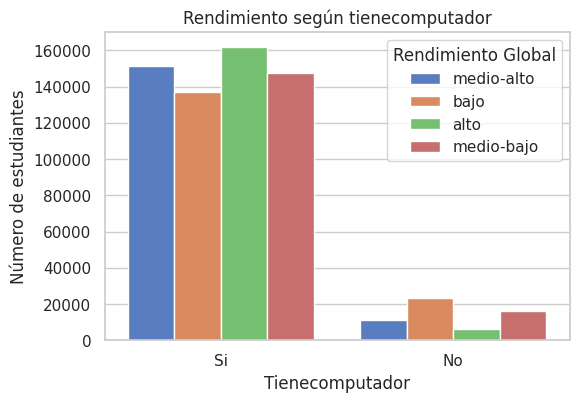

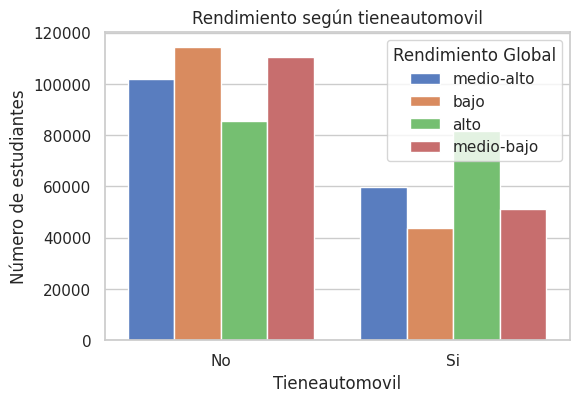

In [28]:
#Acceso a tecnologías (internet, computador, automóvil)

tecnologias = ['F_TIENEINTERNET', 'F_TIENECOMPUTADOR', 'F_TIENEAUTOMOVIL']
for var in tecnologias:
    if var in train.columns:
        plt.figure(figsize=(6,4))
        sns.countplot(
            x=var,
            data=train,
            hue='RENDIMIENTO_GLOBAL',
            order=train[var].value_counts().index
        )
        plt.title(f"Rendimiento según {var.replace('F_', '').replace('_', ' ').lower()}")
        plt.xlabel(var.replace('F_', '').replace('_', ' ').capitalize())
        plt.ylabel("Número de estudiantes")
        plt.legend(title="Rendimiento Global")
        plt.show()

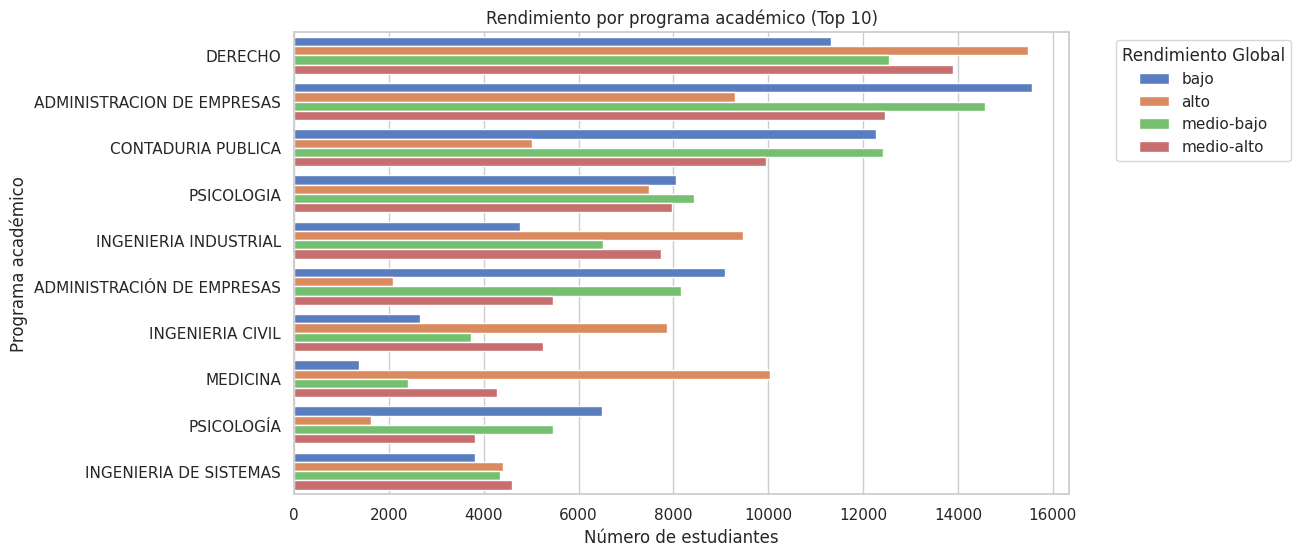

In [29]:
#Programa académico

if 'E_PRGM_ACADEMICO' in train.columns:
    top_programas = train['E_PRGM_ACADEMICO'].value_counts().head(10).index
    plt.figure(figsize=(10,6))
    sns.countplot(
        y='E_PRGM_ACADEMICO',
        data=train[train['E_PRGM_ACADEMICO'].isin(top_programas)],
        hue='RENDIMIENTO_GLOBAL',
        order=top_programas
    )
    plt.title("Rendimiento por programa académico (Top 10)")
    plt.xlabel("Número de estudiantes")
    plt.ylabel("Programa académico")
    plt.legend(title="Rendimiento Global", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

10. Exploración de variables numéricas

In [19]:
num_cols = train.select_dtypes(include=np.number).columns.tolist()
print(f"\nNúmero de variables numéricas: {len(num_cols)}")

# Estadísticas descriptivas básicas
display(train[num_cols].describe().T.head(10))


Número de variables numéricas: 6


,count,mean,std,min,25%,50%,75%,max
ID,692500.0,494606.130576,285585.209455,1.0,247324.750,494564.500,741782.500,989286.000
PERIODO_ACADEMICO,692500.0,20198.366679,10.535037,20183.0,20195.000,20195.000,20203.000,20213.000
INDICADOR_1,692500.0,0.268629,0.122130,0.0,0.203,0.240,0.314,0.657
INDICADOR_2,692500.0,0.259996,0.093480,0.0,0.212,0.271,0.309,0.487
INDICADOR_3,692500.0,0.262087,0.058862,0.0,0.254,0.276,0.293,0.320
INDICADOR_4,692500.0,0.262903,0.067944,0.0,0.255,0.285,0.303,0.332


11. Distribución geográfica

/tmp/ipython-input-3692010567.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_departamentos.index, y=top_departamentos.values, palette="viridis")


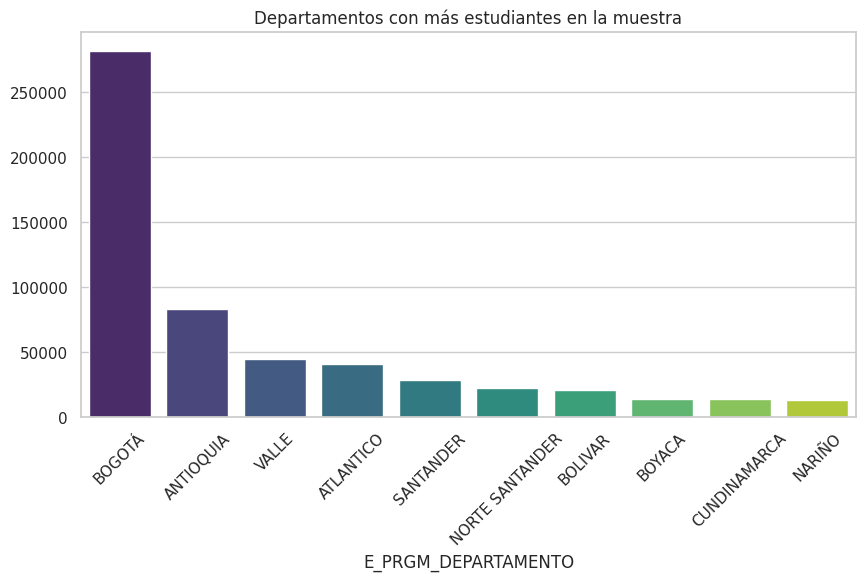

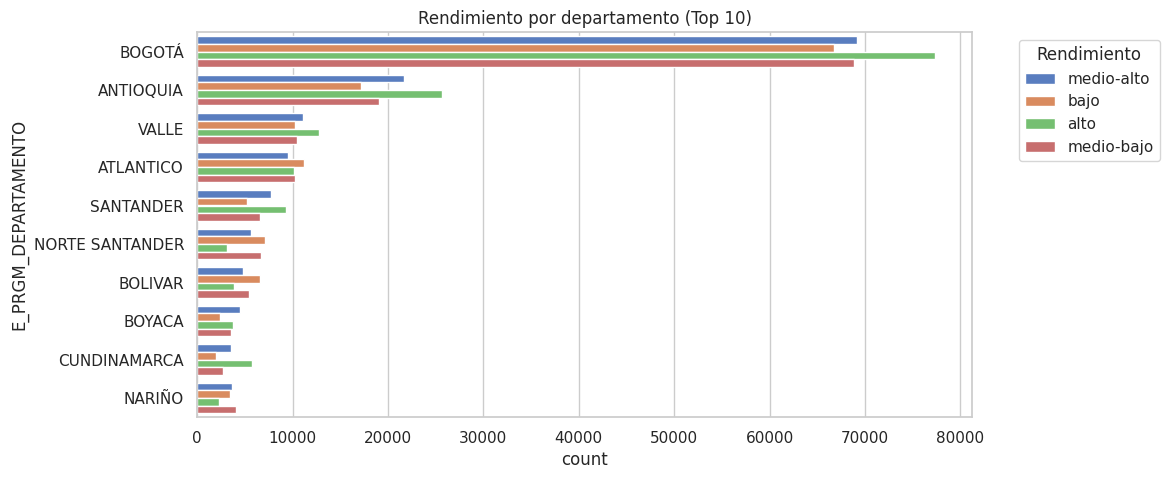

In [21]:
if 'E_PRGM_DEPARTAMENTO' in train.columns:
    top_departamentos = train['E_PRGM_DEPARTAMENTO'].value_counts().head(10)
    plt.figure(figsize=(10,5))
    sns.barplot(x=top_departamentos.index, y=top_departamentos.values, palette="viridis")
    plt.title("Departamentos con más estudiantes en la muestra")
    plt.xticks(rotation=45)
    plt.show()

    # Relación con rendimiento
    plt.figure(figsize=(10,5))
    sns.countplot(y='E_PRGM_DEPARTAMENTO', data=train, order=train['E_PRGM_DEPARTAMENTO'].value_counts().index[:10], hue='RENDIMIENTO_GLOBAL')
    plt.title("Rendimiento por departamento (Top 10)")
    plt.legend(title="Rendimiento", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

12. Número de estudiantes por programa académico

/tmp/ipython-input-3152053550.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


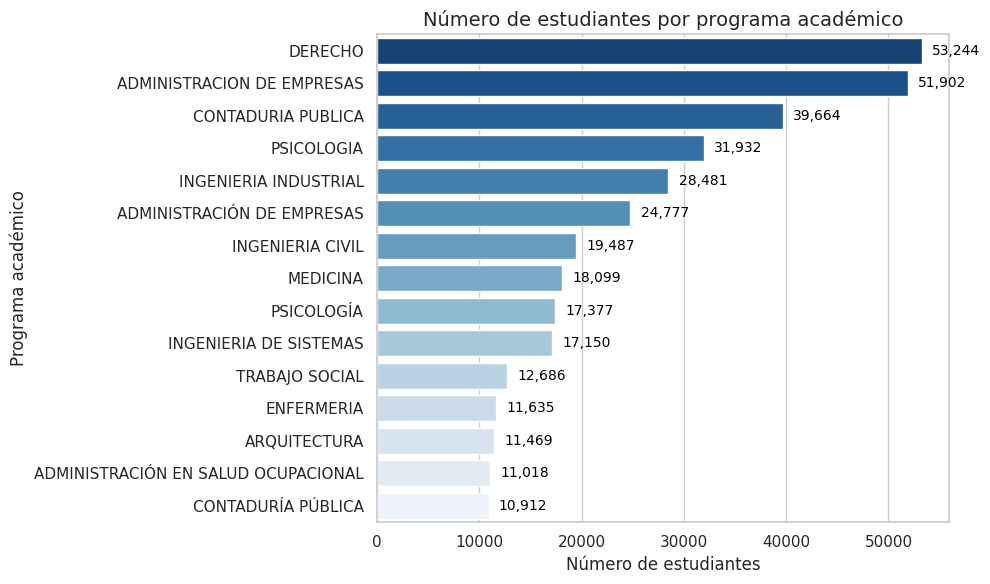

,Programa académico,Número de estudiantes
0,DERECHO,53244
1,ADMINISTRACION DE EMPRESAS,51902
2,CONTADURIA PUBLICA,39664
3,PSICOLOGIA,31932
4,INGENIERIA INDUSTRIAL,28481
5,ADMINISTRACIÓN DE EMPRESAS,24777
6,INGENIERIA CIVIL,19487
7,MEDICINA,18099
8,PSICOLOGÍA,17377
9,INGENIERIA DE SISTEMAS,17150


In [31]:
# Contar estudiantes por programa
programas_count = train['E_PRGM_ACADEMICO'].value_counts().reset_index()
programas_count.columns = ['Programa académico', 'Número de estudiantes']

top_programas = programas_count.head(15)

# Crear el gráfico
plt.figure(figsize=(10,6))
ax = sns.barplot(
    y='Programa académico',
    x='Número de estudiantes',
    data=top_programas,
    palette='Blues_r'
)

for i, v in enumerate(top_programas['Número de estudiantes']):
    ax.text(v + 1000, i, f'{v:,}', color='black', va='center', fontsize=10)

plt.title('Número de estudiantes por programa académico', fontsize=14)
plt.xlabel('Número de estudiantes')
plt.ylabel('Programa académico')
plt.tight_layout()
plt.show()

display(top_programas)


El análisis exploratorio evidenció que el conjunto de datos es amplio, consistente y adecuado para el modelado del rendimiento estudiantil en las Pruebas Saber Pro, se identificaron 692.500 registros con 21 variables que integran información académica, institucional y socioeconómica. La variable objetivo se encuentra completa y correctamente distribuida, mientras que algunas variables presentan valores faltantes en baja proporción; los resultados sugieren que factores como el nivel educativo de los padres, el acceso a tecnologías y el estrato socioeconómico pueden influir significativamente en el desempeño global de los estudiantes.